In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
gdp_path = "Resources/GDP_info _clean.csv"
solarpower_path = "Resources/solar_power_per_country.csv"

# Read the GDP data and the solar power results
gdp_data = pd.read_csv(gdp_path)
solarpower_data = pd.read_csv(solarpower_path)

#Rename Columns, including date columns
gdp_df = gdp_data.rename(columns={"Country Name": "Country", "2016": "2016_GDP", "2017": "2017_GDP", "2018": "2018_GDP", "2019": "2019_GDP","2020": "2020_GDP"})
solarpower_df = solarpower_data.rename(columns={"Country or territory": "Country", "2016_Total": "2016_Solar", "2017_Total": "2017_Solar", "2018_Total": "2018_Solar", "2019_Total": "2019_Solar","2020_Total": "2020_Solar"})

#Drop non-important columns
gdp_df = gdp_df.drop(columns=["Country Code", "Indicator Name", "Indicator Code", "2016_GDP", "2017_GDP", "2018_GDP", "2019_GDP", "2020_GDP"])
solarpower_df = solarpower_df.drop(columns = ["W per capita 2019", "Share of total consumption %"])

In [9]:
# Combine the data into a single dataset
data_df = pd.merge(gdp_df, solarpower_df, how="inner", on="Country")


#Remove NA values
data_df = data_df.dropna(axis = 0, how ="any", thresh = None, subset = None, inplace=False)

# Display the data table for preview
data_df

,Country,2016_New,2016_Solar,2017_New,2017_Solar,2018_New,2018_Solar,2019_New,2019_Solar,2020_New,2020_Solar
2,Australia,839.0,5900.0,1250.0,7200.0,3800.0,11300,3700.0,15928,1699.0,17627
13,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355
18,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783
34,India,3970.0,9010.0,9100.0,18300.0,10800.0,26869,9900.0,35089,4122.0,39211
39,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000
70,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572


In [16]:
solarpower_df_solar = data_df.drop(columns = ["2016_New", "2017_New", "2018_New", "2019_New", "2020_New"])
solarpower_df_solar

,Country,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar
2,Australia,5900.0,7200.0,11300,15928,17627
13,China,78070.0,131000.0,175018,204700,254355
18,Germany,41220.0,42000.0,45930,49200,53783
34,India,9010.0,18300.0,26869,35089,39211
39,Japan,42750.0,49000.0,55500,63000,67000
70,United States,40300.0,51000.0,53184,60682,75572


In [17]:
solarpower_df_new = data_df.drop(columns = ["2016_Solar", "2017_Solar", "2018_Solar", "2019_Solar", "2020_Solar"])

solarpower_df_new

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0


In [18]:
columns= ['2016_Solar','2017_Solar', '2018_Solar','2019_Solar', '2020_Solar']
totals = solarpower_df_solar [columns].sum(axis =0)

In [19]:
totals = totals.tolist()

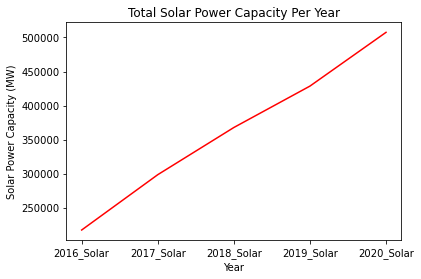

In [27]:
plt.plot(columns, totals, color = "red")
plt.xlabel("Year")
plt.ylabel("Solar Power Capacity (MW)")
plt.title("Total Solar Power Capacity Per Year")
plt.show()

In [22]:
columns_new= ['2016_New','2017_New', '2018_New','2019_New', '2020_New']
totals_new = solarpower_df_new [columns_new].sum(axis =0)

In [23]:
totals_new = totals_new.tolist()

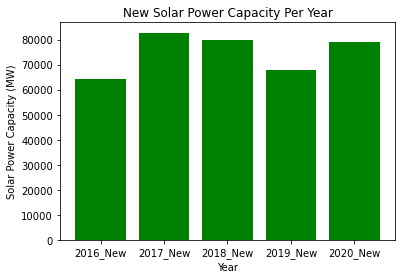

In [28]:
plt.bar(columns_new, totals_new, color = "green")
plt.xlabel("Year")
plt.ylabel("Solar Power Capacity (MW)")
plt.title("New Solar Power Capacity Per Year")
plt.show()

In [30]:
solarpower_df_new.sort_values(by="2020_New", ascending = False)

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0


In [31]:
solarpower_df_new.sort_values(by="2019_New", ascending = False)

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0


In [32]:
solarpower_df_new.sort_values(by="2018_New", ascending = False)

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0


In [33]:
solarpower_df_new.sort_values(by="2017_New", ascending = False)

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0


In [34]:
solarpower_df_new.sort_values(by="2016_New", ascending = False)

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0


In [36]:
rows = ['13', '34', '70', '39']
y_axis = ['2016_New', '2017_New', '2018_New']

In [49]:
avg_gdp = solarpower_df_new
avg_gdp

,Country,2016_New,2017_New,2018_New,2019_New,2020_New
2,Australia,839.0,1250.0,3800.0,3700.0,1699.0
13,China,34540.0,53000.0,45000.0,30100.0,49655.0
18,Germany,1520.0,1800.0,3000.0,3900.0,4583.0
34,India,3970.0,9100.0,10800.0,9900.0,4122.0
39,Japan,8600.0,7000.0,6500.0,7000.0,4000.0
70,United States,14730.0,10600.0,10600.0,13300.0,14890.0


In [52]:
us = avg_gdp.loc[avg_gdp["Country"] == "United States", ["2016_New","2017_New","2018_New","2019_New","2020_New"]]
china = avg_gdp.loc[avg_gdp["Country"] == "China", ["2016_New","2017_New","2018_New","2019_New","2020_New"]]
japan = avg_gdp.loc[avg_gdp["Country"] == "Japan", ["2016_New","2017_New","2018_New","2019_New","2020_New"]]
india = avg_gdp.loc[avg_gdp["Country"] == "India", ["2016_New","2017_New","2018_New","2019_New","2020_New"]]


us_list = list(us.values[0])
china_list = list(china.values[0])
japan_list = list(japan.values[0])
india_list = list(india.values[0])

years = ["2016", "2017","2018", "2019", "2020"]

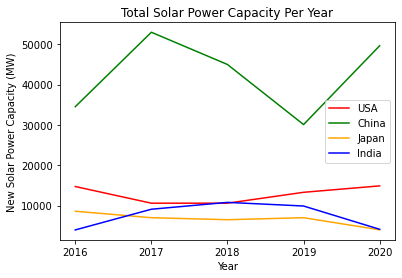

In [88]:
us_plot = plt.plot(years, us_list, color = "red", label = "USA")
china_plot = plt.plot(years, china_list, color = "green", label = "China")
japan_plot = plt.plot(years, japan_list, color = "orange", label = "Japan")
india_plot = plt.plot(years, india_list, color = "blue", label = "India")

plt.legend(loc = "right")

plt.xlabel("Year")
plt.ylabel("New Solar Power Capacity (MW)")
plt.title("Total Solar Power Capacity Per Year")
plt.show()